In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [189]:
df = pd.read_csv("baitap.csv")

X = df.values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Chuan hoa du lieu

In [190]:
X = X.astype('float64')
minmax_scaler = MinMaxScaler()
X[:, 0] = minmax_scaler.fit_transform(X[:, 0].reshape(-1, 1)).ravel()
X[:, 1] = minmax_scaler.fit_transform(X[:, 1].reshape(-1, 1)).ravel()
new_df = pd.DataFrame.from_records(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [191]:
K=5

In [192]:
def create_centers(X):
    indicates = np.random.randint(0, len(X), size=K)
    initial_centers = X[indicates]
    return initial_centers

centers = create_centers(X)
centers = {i: value for i, value in enumerate(centers)}
centers

{0: array([0.68852459, 0.3877551 ]),
 1: array([0.68032787, 0.8877551 ]),
 2: array([0.25409836, 0.51020408]),
 3: array([0.58196721, 0.19387755]),
 4: array([0.90983607, 0.2755102 ])}

In [193]:
import copy

def fit(X, max_iter, epsilon, centers):
    count = 0
    while count < max_iter:
        features = {cluster: [] for cluster in range(K)}
        for x in X:
            distances = [np.linalg.norm(x - centers[center]) for center in centers]
            nearest = np.argmin(distances)
            features[nearest].append(x)
            
        old_centers = copy.deepcopy(centers)
        is_optimal = False
        for center in centers:
            centers[center] = np.mean(features[center], axis=0)
            if np.abs(centers[center] - old_centers[center]).all() < epsilon:
                is_optimal = True
    
        if is_optimal:
            break 
        count+=1
    return centers

centers = fit(X, max_iter=100, epsilon=1e-4, centers=centers)
centers

{0: array([0.39019809, 0.46152211]),
 1: array([0.58638083, 0.82783883]),
 2: array([0.18575032, 0.60047096]),
 3: array([0.26639344, 0.10932945]),
 4: array([0.67786885, 0.19387755])}

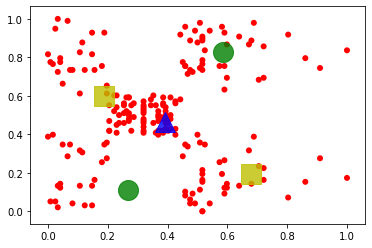

In [194]:
def plot(df):
    plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], color='red', edgecolor='none')

def plot_result(centers, df):
    plot(df)
    plt.plot(centers[0][0], centers[0][1], 'b^', markersize = 20, alpha = .8)
    plt.plot(centers[1][0], centers[1][1], 'go', markersize = 20, alpha = .8)
    plt.plot(centers[2][0], centers[2][1], 'ys', markersize = 20, alpha = .8)
    plt.plot(centers[3][0], centers[3][1], 'go', markersize = 20, alpha = .8)
    plt.plot(centers[4][0], centers[4][1], 'ys', markersize = 20, alpha = .8)

plot_result(centers, new_df)

# Su dung thu vien

In [195]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=K, init='k-means++')
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [196]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, cluster.labels_)
print("Score=", score)

Score= 0.5594854531227246


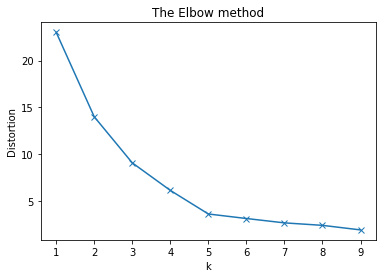

In [197]:
def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1, 10))

# chon k = 5